In [ ]:
#Exercice 1
import pandas as pd
data = pd.read_csv("iris.csv")
data.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np

def coeff(X, y):
    m = len(X)
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    a = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
    b = y_mean - a * x_mean

    return a, b


In [ ]:
def afficher_valeurs_obs(X, y):
    print("Valeurs Observées:")
    for i in range(len(X)):
        print(f"X={X[i]}, Y={y[i]}")

In [ ]:
def predict(X_new, a, b):
    return a * X_new + b

In [ ]:
def afficher_valeurs_predites_model(X, Y_predit):
    print("Valeurs Prédites:")
    for i in range(len(X)):
        print(f"X={X[i]}, Y_prédit={Y_predit[i]}")

In [ ]:
# Charger les données Iris
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data[:, 0]
y_iris = iris.target

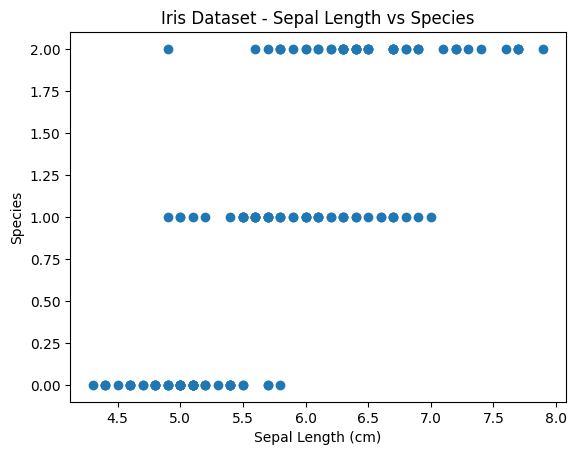

In [ ]:
#Visualiser les données sous forme de nuage de points
import matplotlib.pyplot as plt

plt.scatter(X_iris, y_iris)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Species")
plt.title("Iris Dataset - Sepal Length vs Species")
plt.show()


In [ ]:
#Appliquer le modèle de régression implémenté sur les données Iris
a_iris, b_iris = coeff(X_iris, y_iris)
Y_predit_iris = predict(X_iris, a_iris, b_iris)


In [ ]:
afficher_valeurs_predites_model(X_iris, Y_predit_iris)

Valeurs Prédites:
X=5.1, Y_prédit=0.4245020472749217
X=4.9, Y_prédit=0.2696595487838698
X=4.7, Y_prédit=0.11481705029281741
X=4.6, Y_prédit=0.03739580104729079
X=5.0, Y_prédit=0.34708079802939595
X=5.4, Y_prédit=0.6567657950115011
X=4.6, Y_prédit=0.03739580104729079
X=5.0, Y_prédit=0.34708079802939595
X=4.4, Y_prédit=-0.11744669744376068
X=4.9, Y_prédit=0.2696595487838698
X=5.4, Y_prédit=0.6567657950115011
X=4.8, Y_prédit=0.19223829953834315
X=4.8, Y_prédit=0.19223829953834315
X=4.3, Y_prédit=-0.1948679466892873
X=5.8, Y_prédit=0.966450791993605
X=5.7, Y_prédit=0.8890295427480792
X=5.4, Y_prédit=0.6567657950115011
X=5.1, Y_prédit=0.4245020472749217
X=5.7, Y_prédit=0.8890295427480792
X=5.1, Y_prédit=0.4245020472749217
X=5.4, Y_prédit=0.6567657950115011
X=5.1, Y_prédit=0.4245020472749217
X=4.6, Y_prédit=0.03739580104729079
X=5.1, Y_prédit=0.4245020472749217
X=4.8, Y_prédit=0.19223829953834315
X=5.0, Y_prédit=0.34708079802939595
X=5.0, Y_prédit=0.34708079802939595
X=5.2, Y_prédit=0.501923

In [ ]:
# Evaluation du modèle
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def R2(y_true, y_pred):
    SS_res = np.sum((y_true - y_pred) ** 2)
    SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (SS_res / SS_tot)

mse_iris = MSE(y_iris, Y_predit_iris)
r2_iris = R2(y_iris, Y_predit_iris)
print("MSE:", mse_iris)
print("R2 Score:", r2_iris)

MSE: 0.25839861231192535
R2 Score: 0.6124020815321121


In [ ]:
#Exercice 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

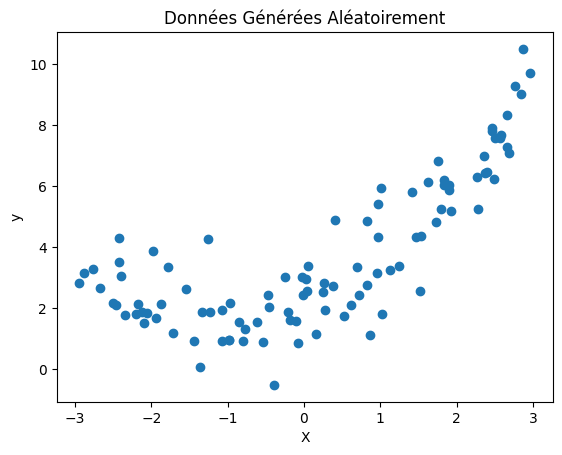

In [ ]:
# 1. Représenter les données sous forme de nuage de points
plt.scatter(X, y)
plt.title("Données Générées Aléatoirement")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# 2. Transformer les données en ajoutant les carrés des variables
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
# 3. Appliquer un modèle de régression linéaire sur les données transformées
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


LinearRegression()

In [ ]:
print("Coefficients du modèle:", lin_reg.coef_)
print("Intercept du modèle:", lin_reg.intercept_)

Coefficients du modèle: [[0.96680858 0.47835838]]
Intercept du modèle: [2.1242224]


In [ ]:
# 4. Générer de nouvelles données pour le test
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)


In [ ]:
# 5. Calculer les valeurs prédites Y_predit et affichier le modéle obtenu
def predict_values(X_poly, coeff, b):
    return np.dot(X_poly, coeff.T) + b

Y_predit = predict_values(X_new_poly, lin_reg.coef_, lin_reg.intercept_)


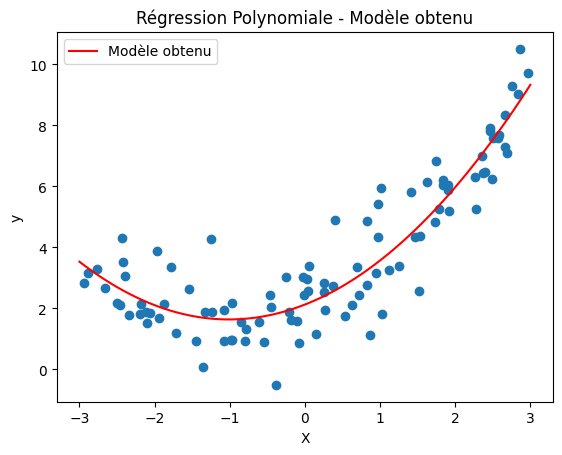

In [ ]:
plt.scatter(X, y)
plt.plot(X_new, Y_predit, 'r-', label='Modèle obtenu')
plt.title("Régression Polynomiale - Modèle obtenu")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
# 6. Calculer MSE
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_custom = MSE(y, predict_values(X_poly, lin_reg.coef_, lin_reg.intercept_))
print("MSE (calculé manuellement):", mse_custom)


MSE (calculé manuellement): 0.9268351133317841


In [ ]:
# 7. Comparer avec la fonction mean_squared_error de sklearn
mse_sklearn = mean_squared_error(y, lin_reg.predict(X_poly))
print("MSE (sklearn):", mse_sklearn)

MSE (sklearn): 0.9268351133317841
